# GDP, life expectancy and their relationship
## Preparing the data

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
#import statsmodels
import matplotlib.pyplot as plt
#import math


#testing the pandas and numpy

data_file = pd.read_csv('all_data.csv')
#print(data_file.head())
# print('######################')
#print(data_file[data_file['Country'] == 'Chile' and data_file['Year'] == '2000'])
#print(data_file.iloc[5])
print(data_file.info())
print(data_file.head())
# print(np.max(data_file['Year']))
# print(np.max(data_file['Life expectancy at birth (years)']))
print(np.max(data_file['GDP']))
print(np.min(data_file['GDP']))
data_chile = data_file[data_file['Country']=='Chile']
# print('######################')
# print(np.median(data_chile['Life expectancy at birth (years)']))
# print(np.median(data_file['Life expectancy at birth (years)']))

#Working out GDP values
data_file.GDP = data_file['GDP'].apply(lambda x: round((x / 1000000000),4))
data_file.rename(columns = {'Life expectancy at birth (years)':'Life'}, inplace = True)
print(data_file.head())
print(data_file.Country.unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
18100000000000.0
4415702800.0
  Country  Year  Life      GDP
0   Chil

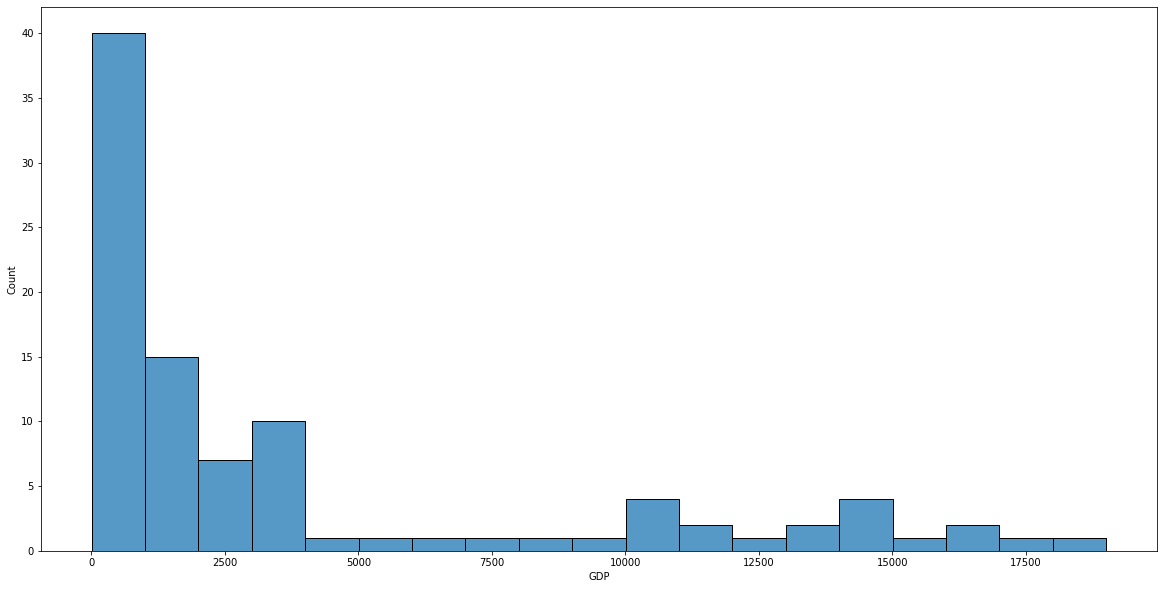

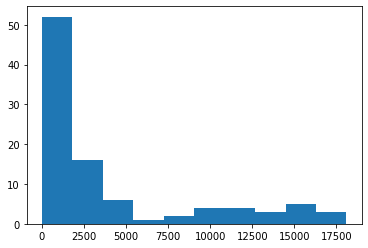

18100.0


<Figure size 432x288 with 0 Axes>

In [3]:
#testing seaborn
plt.figure(figsize=(20,10))
sns.histplot(data_file['GDP'], binwidth=1000)
plt.show()
plt.clf()

plt.hist(data_file['GDP'])
#plt.axis([4400000000, 19000000000000, 0, 100])
plt.show()
plt.clf()

print(np.max(data_file.GDP))

#Check trends over time and estimate the linear relationship between GDP and life expectancy
	- plot a line chart showing each country's GDP and life expectancy trend
	- estimate the linear correlation

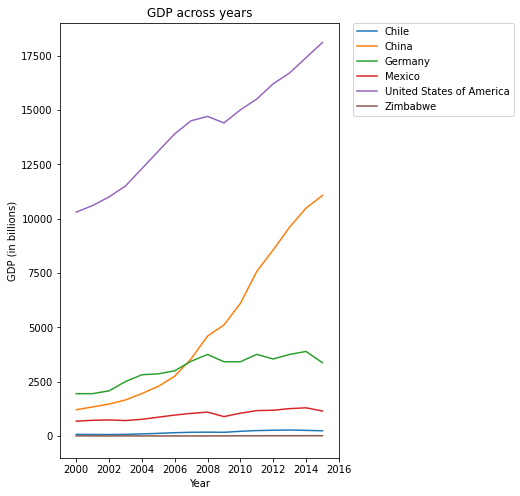

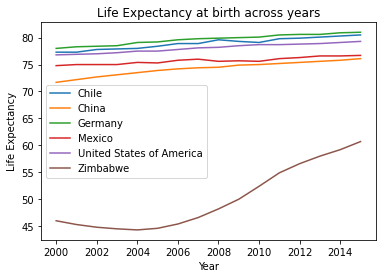

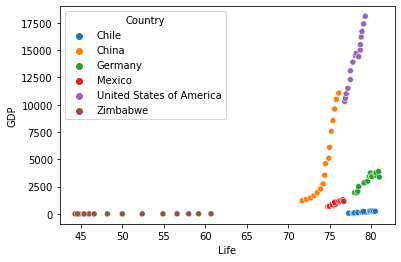

<Figure size 432x288 with 0 Axes>

In [36]:

plt.figure(figsize=[5,8])
for i in data_file.Country.unique():
    yvalues= data_file['GDP'][data_file['Country']==i]
    xvalues= data_file['Year'][data_file['Country']==i]
    plt.plot(xvalues, yvalues)
plt.legend(data_file.Country.unique(), bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.) 
plt.axis([1999,2016,-1000,19000])
plt.title("GDP across years")
plt.xlabel('Year')
plt.ylabel('GDP (in billions)')
plt.show()
plt.clf()

for i in data_file.Country.unique():
    yvalues= data_file['Life'][data_file['Country']==i]
    xvalues= data_file['Year'][data_file['Country']==i]
    plt.plot(xvalues, yvalues)

plt.legend(data_file.Country.unique())   
plt.title("Life Expectancy at birth across years")
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()
plt.clf()

# country_list = ['Germany']
# for i in country_list:
#     yvalues= data_file['Life expectancy at birth (years)'][data_file['Country']==i]
#     xvalues= data_file['GDP'][data_file['Country']==i]
#     plt.plot(xvalues, yvalues)
# plt.legend(data_file.Country.unique())    
# plt.show()
# plt.clf()


# sns.scatterplot(y = 'GDP', x = 'Life expectancy at birth (years)', data = data_file[data_file['Country']=="Zimbabwe"], hue = 'Country')
# plt.show()
# plt.clf()


sns.scatterplot(y = 'GDP', x = 'Life', data = data_file, hue = 'Country')
plt.show()
plt.clf()



In [30]:
import statsmodels.api as sm
model = sm.OLS.from_formula('Life expectancy at birth (years) ~ GDP', data = data_file)
# Fit the model here:
results = model.fit()
# Print the coefficients here:
print(results.params)

SyntaxError: invalid syntax (<unknown>, line 1)

#Compare countries' GDP and life expectancy
	- bar chart comparing countries' GDP
	- bar chart comparing countries' life expectancy
	- scatter plot (?) - GDP vs life expectancy (hue = country)

#Check whether GDP can predict life expectancy
	- ?? Estimate the % difference in GDP between countries and their related % difference in life expectancy (median difference?)
	- ?? estimate the differences for every year
	- plot mean GDP and mean LE from every country